In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import lifelines
from lifelines import KaplanMeierFitter
from lifelines import AalenAdditiveFitter
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import patsy
from statsmodels.sandbox import cox
from IPython.core.pylabtools import figsize

In [2]:
data = lifelines.datasets.load_dd()

In [3]:
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [4]:
kmf = KaplanMeierFitter()


In [5]:
T = data["duration"]
C = data["observed"]
kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

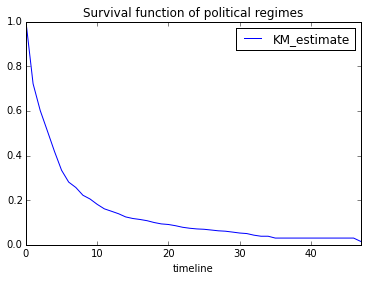

/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


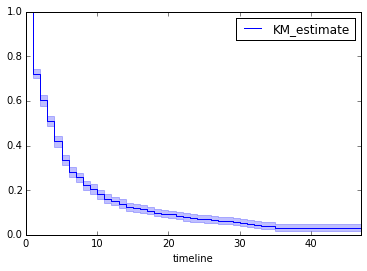

In [6]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');
kmf.plot()

In [7]:
kmf

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

In [8]:
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [9]:
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')

In [10]:
X.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year
0,0,0,1,0,0,0,0,1,0,0,1946
1,0,0,1,0,0,0,0,0,0,0,1953
2,0,0,1,0,0,0,0,1,0,0,1963
3,0,0,1,0,0,0,0,0,0,0,1973
4,0,0,1,0,0,0,0,0,0,0,1978


In [11]:
X.columns

Index([u'un_continent_name[Africa]', u'un_continent_name[Americas]',
       u'un_continent_name[Asia]', u'un_continent_name[Europe]',
       u'un_continent_name[Oceania]', u'regime[T.Military Dict]',
       u'regime[T.Mixed Dem]', u'regime[T.Monarchy]',
       u'regime[T.Parliamentary Dem]', u'regime[T.Presidential Dem]',
       u'start_year'],
      dtype='object')

In [12]:
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)

In [13]:
data = lifelines.datasets.load_dd()

X['T'] = data['duration']
X['E'] = data['observed']

In [14]:
X.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,T,E
0,0,0,1,0,0,0,0,1,0,0,1946,7,1
1,0,0,1,0,0,0,0,0,0,0,1953,10,1
2,0,0,1,0,0,0,0,1,0,0,1963,10,1
3,0,0,1,0,0,0,0,0,0,0,1973,5,0
4,0,0,1,0,0,0,0,0,0,0,1978,1,0


In [15]:
aaf.fit(X, 'T', event_col='E')

 [-----------------100%-----------------] 1468 of 1468 complete in 1.7 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

In [16]:
figsize(12.5,8)
aaf.cumulative_hazards_.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,baseline
1,-0.051595,-0.082406,0.010666,0.154493,-0.060438,0.075333,0.086274,-0.133938,0.048077,0.127171,0.000116,-0.029280
2,-0.014713,-0.039471,0.095668,0.194251,-0.092696,0.115033,0.358702,-0.226233,0.168783,0.121862,0.000053,0.143039
3,0.007389,-0.064758,0.115121,0.170549,0.069371,0.161490,0.677347,-0.271183,0.328483,0.146234,0.000004,0.297672
4,-0.058418,0.011399,0.091784,0.205824,0.125722,0.220028,0.932674,-0.294900,0.365604,0.422617,0.000002,0.376311
5,-0.099282,0.106641,0.112083,0.150708,0.091900,0.241575,1.123860,-0.391103,0.536185,0.743913,0.000057,0.362049


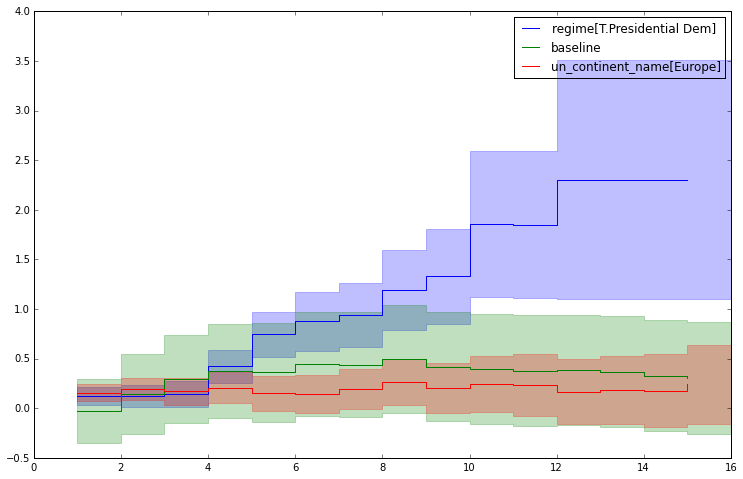

In [17]:
aaf.plot( columns=[ 'regime[T.Presidential Dem]', 'baseline', 'un_continent_name[Europe]' ], ix=slice(1,15) )

In [18]:
ix = (data['ctryname'] == 'Canada') * (data['start_year'] == 2006)
harper = X.ix[ix]
harper.pop('T')
harper.pop('E')
harper

/opt/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year
268,0,1,0,0,0,0,0,0,1,0,2006


In [19]:
aaf.predict_expectation(np.array(harper))


,0
0,4.105156


In [20]:
arr = np.array([[0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,2003.]])
aaf.predict_expectation(arr)

,0
0,22.057933


In [21]:
print aaf.timeline
print aaf.hazards_

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  35.  47.]
    un_continent_name[Africa]  un_continent_name[Americas]  \
1                   -0.051595                    -0.082406   
2                    0.036882                     0.042935   
3                    0.022102                    -0.025287   
4                   -0.065807                     0.076156   
5                   -0.040864                     0.095242   
6                   -0.008503                     0.139230   
7                   -0.061493                     0.011167   
8                   -0.085060                    -0.028536   
9                   -0.049755                    -0.045149   
10                  -0.016200                     0.044369   
11                  -0.053249                    -0.106564   
12                  -0.035532                     0.007214   
13             

area = 905.0
area = 92.0


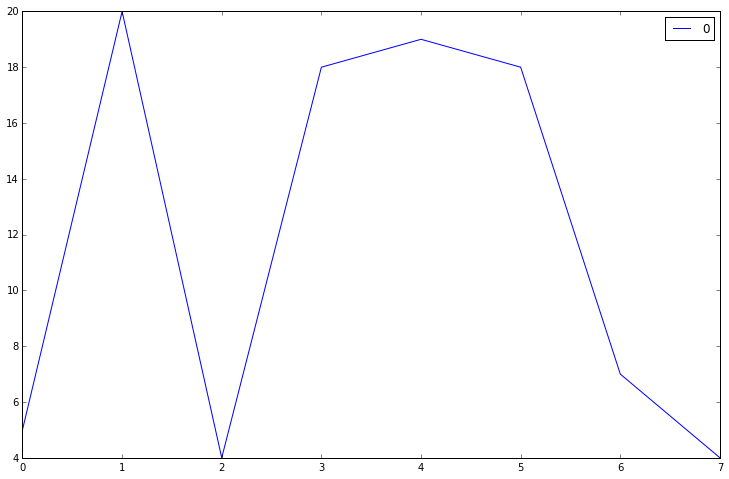

In [43]:
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([5, 20, 4, 18, 19, 18, 7, 4])
pd.DataFrame(data=y).plot()
# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=10)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=1)
print("area =", area)

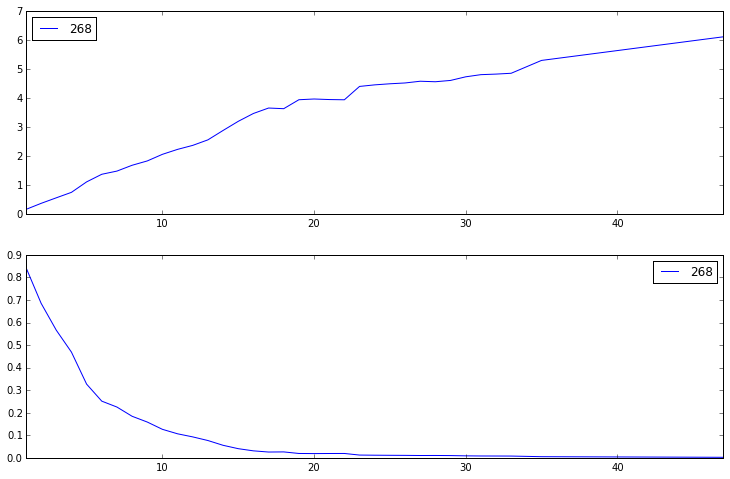

In [23]:
ax = plt.subplot(2,1,1)
aaf.predict_cumulative_hazard(harper).plot(ax=ax)
ax = plt.subplot(2,1,2)
aaf.predict_survival_function(harper).plot(ax=ax);

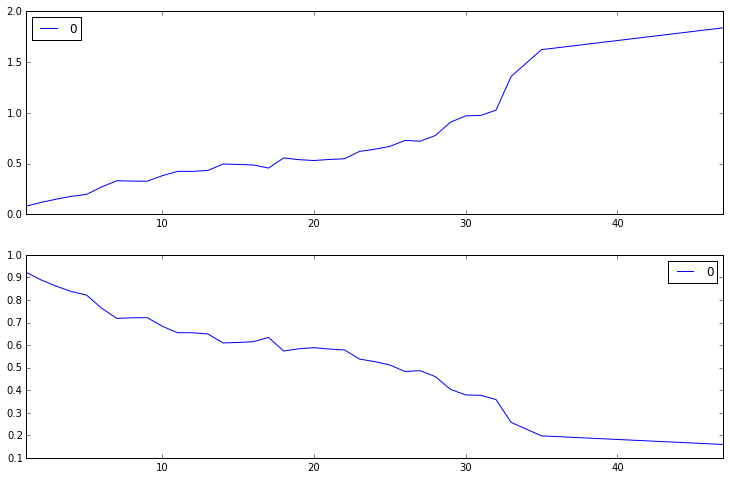

In [24]:
ax = plt.subplot(2,1,1)
aaf.predict_cumulative_hazard(arr).plot(ax=ax)
ax = plt.subplot(2,1,2)
aaf.predict_survival_function(arr).plot(ax=ax);

In [25]:
rossi_dataset = load_rossi()
rossi_dataset[0:5]

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [26]:
cf = CoxPHFitter()
cf.fit(rossi_dataset, 'week', event_col='arrest')

cf.print_summary()  # access the results using cf.summary

n=432, number of events=114

           coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95    
fin  -1.897e-01  8.272e-01 9.579e-02 -1.981e+00 4.763e-02  -3.775e-01  -1.938e-03   *
age  -3.500e-01  7.047e-01 1.344e-01 -2.604e+00 9.210e-03  -6.134e-01  -8.651e-02  **
race  1.032e-01  1.109e+00 1.012e-01  1.020e+00 3.078e-01  -9.516e-02   3.015e-01    
wexp -7.486e-02  9.279e-01 1.051e-01 -7.124e-01 4.762e-01  -2.809e-01   1.311e-01    
mar  -1.421e-01  8.675e-01 1.254e-01 -1.134e+00 2.570e-01  -3.880e-01   1.037e-01    
paro -4.134e-02  9.595e-01 9.522e-02 -4.341e-01 6.642e-01  -2.280e-01   1.453e-01    
prio  2.639e-01  1.302e+00 8.291e-02  3.182e+00 1.460e-03   1.013e-01   4.264e-01  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640


/opt/anaconda/lib/python2.7/site-packages/lifelines/fitters/coxph_fitter.py:285: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(duration_col, inplace=True)


In [27]:
X = rossi_dataset[5:6]

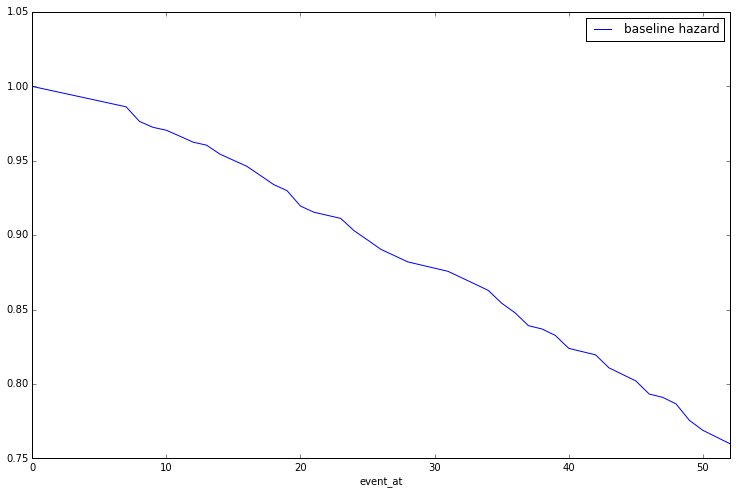

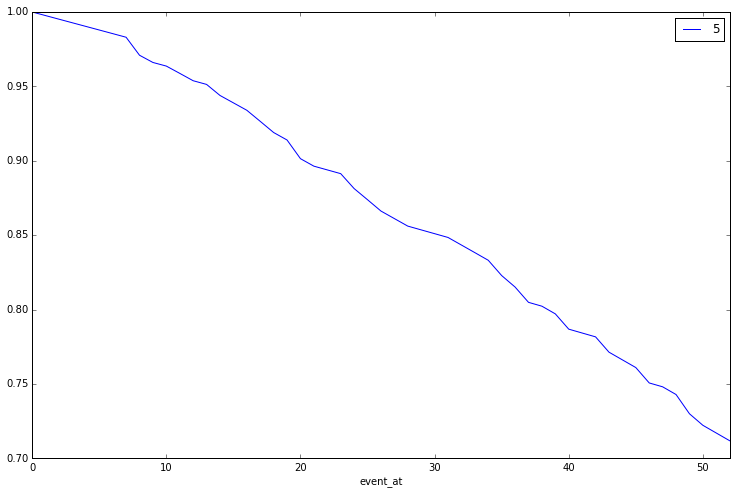

In [28]:
cf.baseline_survival_.plot()
cf.predict_survival_function(X).plot()

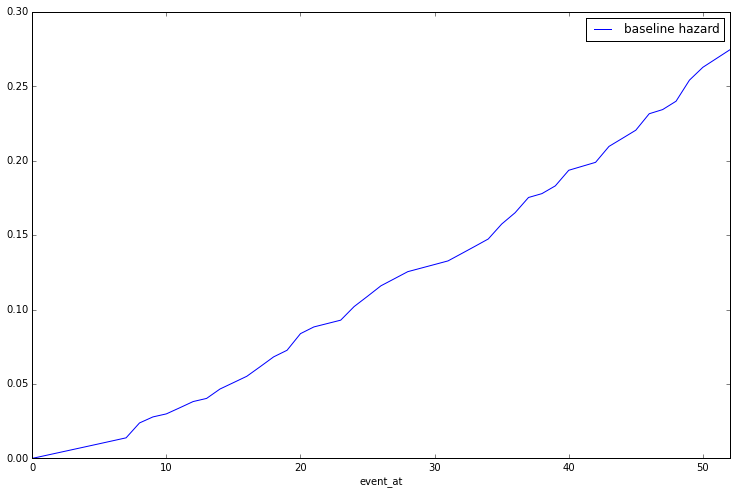

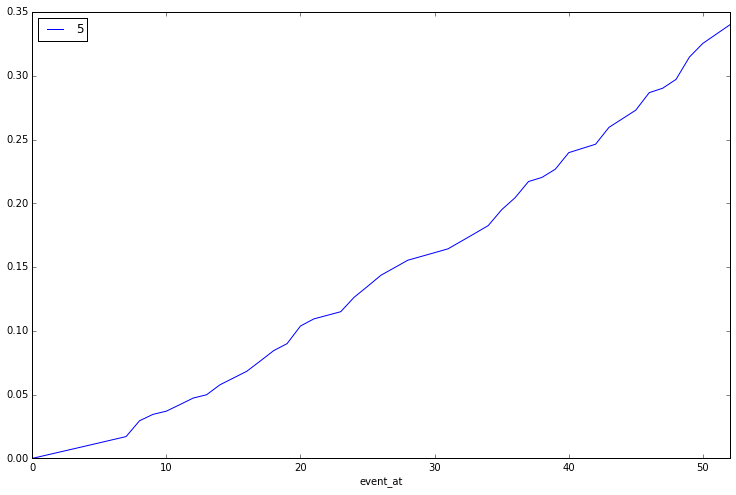

In [29]:
cf.baseline_cumulative_hazard_.plot()
cf.predict_cumulative_hazard(X).plot()

In [30]:
data = lifelines.datasets.load_dd()
cf2 = CoxPHFitter()

# X['T'] = data['duration']
# X['E'] = data['observed']
# aaf.fit(X, 'T', event_col='E')
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')
X['T'] = data['duration']
X['E'] = data['observed']
cf2.fit(X, 'T', event_col='E')

<lifelines.CoxPHFitter: fitted with 1808 observations, 340 censored>

In [35]:
arr = np.array([[0.,0.,1.,0.,0.,0.,0.,1.,0.,0.,2003.]])
aaf.predict_expectation(arr), aaf.predict_expectation(np.array(harper))

(           0
 0  22.057933,           0
 0  4.105156)

In [36]:
cf2.predict_expectation(arr), cf2.predict_expectation(np.array(harper))

(           0
 0  26.623638,           0
 0  5.401313)

In [ ]:
cf2.print_summary()
cf2.baseline_survival_.plot()
cf2.baseline_hazard_.plot()
cf2.baseline_cumulative_hazard_.plot()
